#Aprendizagem Supervisionada: Classificação

##1º) Importar bibliotecas
##2º) Carregar o dataset
##3º) Separar variáveis preditoras das variáveis respostas
##4º) Dividir o conjunto de dados entre treino e teste
##5º) Aplicar o algorítimo KNN
##6º) Estabelecer acurácia do modelo

##Termos de Machine Learning que iremos utilizar nesse projeto.

###- Sample == Uma amostra , "uma linha do dataset"
###- Feature == Caracteristica do sample

##Nesse dataset vamos trabalhar com 04 características da flor Iris:
###- Comprimento da sépala
###- Largura da sépala
###- Comprimento da pétala
###- Largura da pétala

###Pétalas: protegem partes reprodutoras da planta e atraem polinizadores
###Sépala: Parte externa que envolvem o botão da flor e é semelhantes a folha.

# Importando:
## sklearn : Essa biblioteca de ML possui vários algoritmos de classificação, regressão e agrupamento e etc.
### load_iris : para carregar o dataset da iris
### train_test_split : Divide arrays e matrizes em subconjuntos de treino e teste
### KNeighborsClassifier : k-ésimo vizinho mais próximo
## matplotlib : É uma biblioteca de plotagem de gráfico
### %matplotlib inline : Plota o gráfico no própio notebook
## numpy : É uma biblioteca do Python para trabalhar com arrays e matrizes multidimensionais fazendo operações matemáticas com essas estrututras.


In [0]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Target classes que iremos prever:

###- Iris Setosa
###- Iris Versicolour
###- Iris Virginica






## Visualizamos o nosso DataSet usando o Pandas

In [0]:
url = "https://raw.githubusercontent.com/dressalsl/introducaoScikitLearn/master/dataSets/Iris.csv"
iris_pd = pd.read_csv(url)
iris_pd.head(30)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Visualizamos o nosso DataSet usando o Numpy

In [0]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

## Visualizando as colunas:
###com o numpy usamos o .keys()



In [0]:
iris_np.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

##Caracteristicas do DataSet:

In [0]:
descricao = iris['DESCR'][:193]+"\n..."
print (descricao)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


## A coluna target_names retorna os tipos de flores Iris

###dtype='<U10' significa que é uma string que possui menos de 10 caracteres

In [0]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## A coluna feature_names exibe as caracteristicas da nossa sample

In [0]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Visualizar as linhas e colunas do Dataset, nesse caso observe que possui 150 sample e 4 features

In [0]:
iris.data.shape

(150, 4)

In [0]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)

150
4


## Perceba que cada um dos 12 sample exibidos possuem 4 features

In [0]:
iris["data"][:12]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2]])

## O objetivo na Análise Supervisionada é encontrar um modelo que que faça a relação entre as variáveis de entrada com o target, que é a saída do seu treinamento classificatório, é a "variável alvo", o que eu estou tentanto prever. Posteriormente iremos estudar como chega nesse resultado e o  0,1 e 2 representa Setosa , Vesicolor e Virginica respectivamente.


In [0]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##A função train_test_split irá dividir o dataset em duas partes... 
###Uma com 60% do dataset que será usada para treinar o algoritmo para realizar predições com os 40% restantes do dataset. Por defaut, sem usar a função train/test_size será dividido 75% do dataset para treino e 25% para teste.

In [0]:
treino1,teste1,treino2,teste2 = train_test_split(iris["data"],iris["target"],train_size=0.6,test_size=0.4,random_state = 0)
print(treino1.shape)
print(teste1.shape)


(90, 4)
(60, 4)


##Usaremos o matplot para gerar um gráfico de disperção que nos dará a visualização da distibuição dos dados de medição das pétadas e sépalas


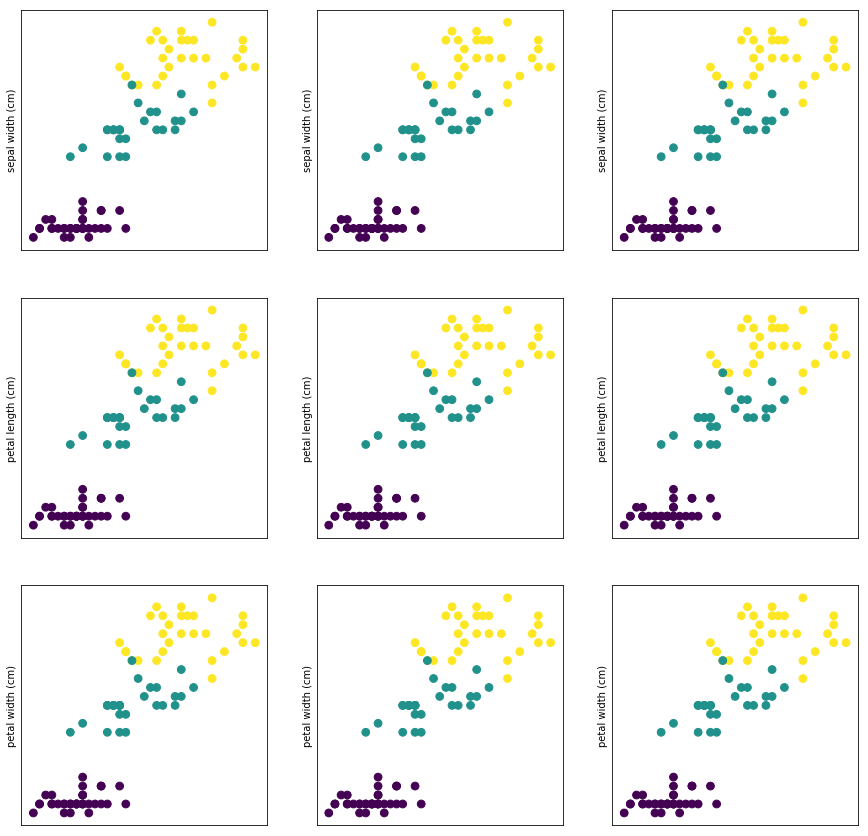

In [0]:

fig, ax = plt.subplots(3,3, figsize=(15,15))

for x in range(3):
  for y in range(3):
    ax[x,y].scatter(treino1[:,j],treino1[:,i+1], c = treino2, s= 60)
    ax[x,y].set_xticks(())
    ax[x,y].set_yticks(())
    if j == 0:
      ax[x,y].set_ylabel(iris["feature_names"][x+1])
    elif x == 2:
      ax[x,y].set_xlabel(iris["feature_names"][y])
    elif x < y :
      ax[x,y].set_visible(False)
      


##O KNN é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. KNeighborsClassifier mapeia os dados existentes no dataset e quando o modelo está pronto e são inseridos novos dados para predição , o algoritmo procura qual é o ponto mais próximo desse novo dado inserido. O argumento n_neighbors = 3 representa a quantidade de vizinhos que eu quero que o algortimo considere para fazer a previsão da flor.
###Criando modelo

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(treino1,treino2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

##Vamos inserir um novo dado de uma flor e descobrir se o algoritmo consegue prever.

###Testando o 1º modelo:

In [0]:
novo = np.array([[2, 1.8, 1.9, 0.3]])
novo.shape

(1, 4)

## A variavel predicao preveu [0] que coluna "target" é a flor da espécie Setosa

In [0]:
predicao = knn.predict(novo)
predicao

array([0])

### Conferindo o nome da espécie da flor descoberta

In [0]:
iris["target_names"][predicao]

array(['setosa'], dtype='<U10')

## Para saber a precisão do nosso modelo testado usamos a função score

In [0]:
knn.score(teste1,teste2)

0.9333333333333333

#O resultado foi de 97% de precisão!